In [41]:
import os
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)

In [5]:
file_path_white = '/Users/U756064/PycharmProjects/ML_ETE/data/winequality-white.csv'
file_path_red = '/Users/U756064/PycharmProjects/ML_ETE/data/winequality-red.csv'
wine_white = pd.read_csv(file_path_white, delimiter = ";")
wine_red = pd.read_csv(file_path_red, delimiter = ";")

In [6]:
wine_white["type"] = "white"
wine_red["type"] = "red"
wines = pd.concat([wine_white, wine_red], axis=0, ignore_index=True)

In [7]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

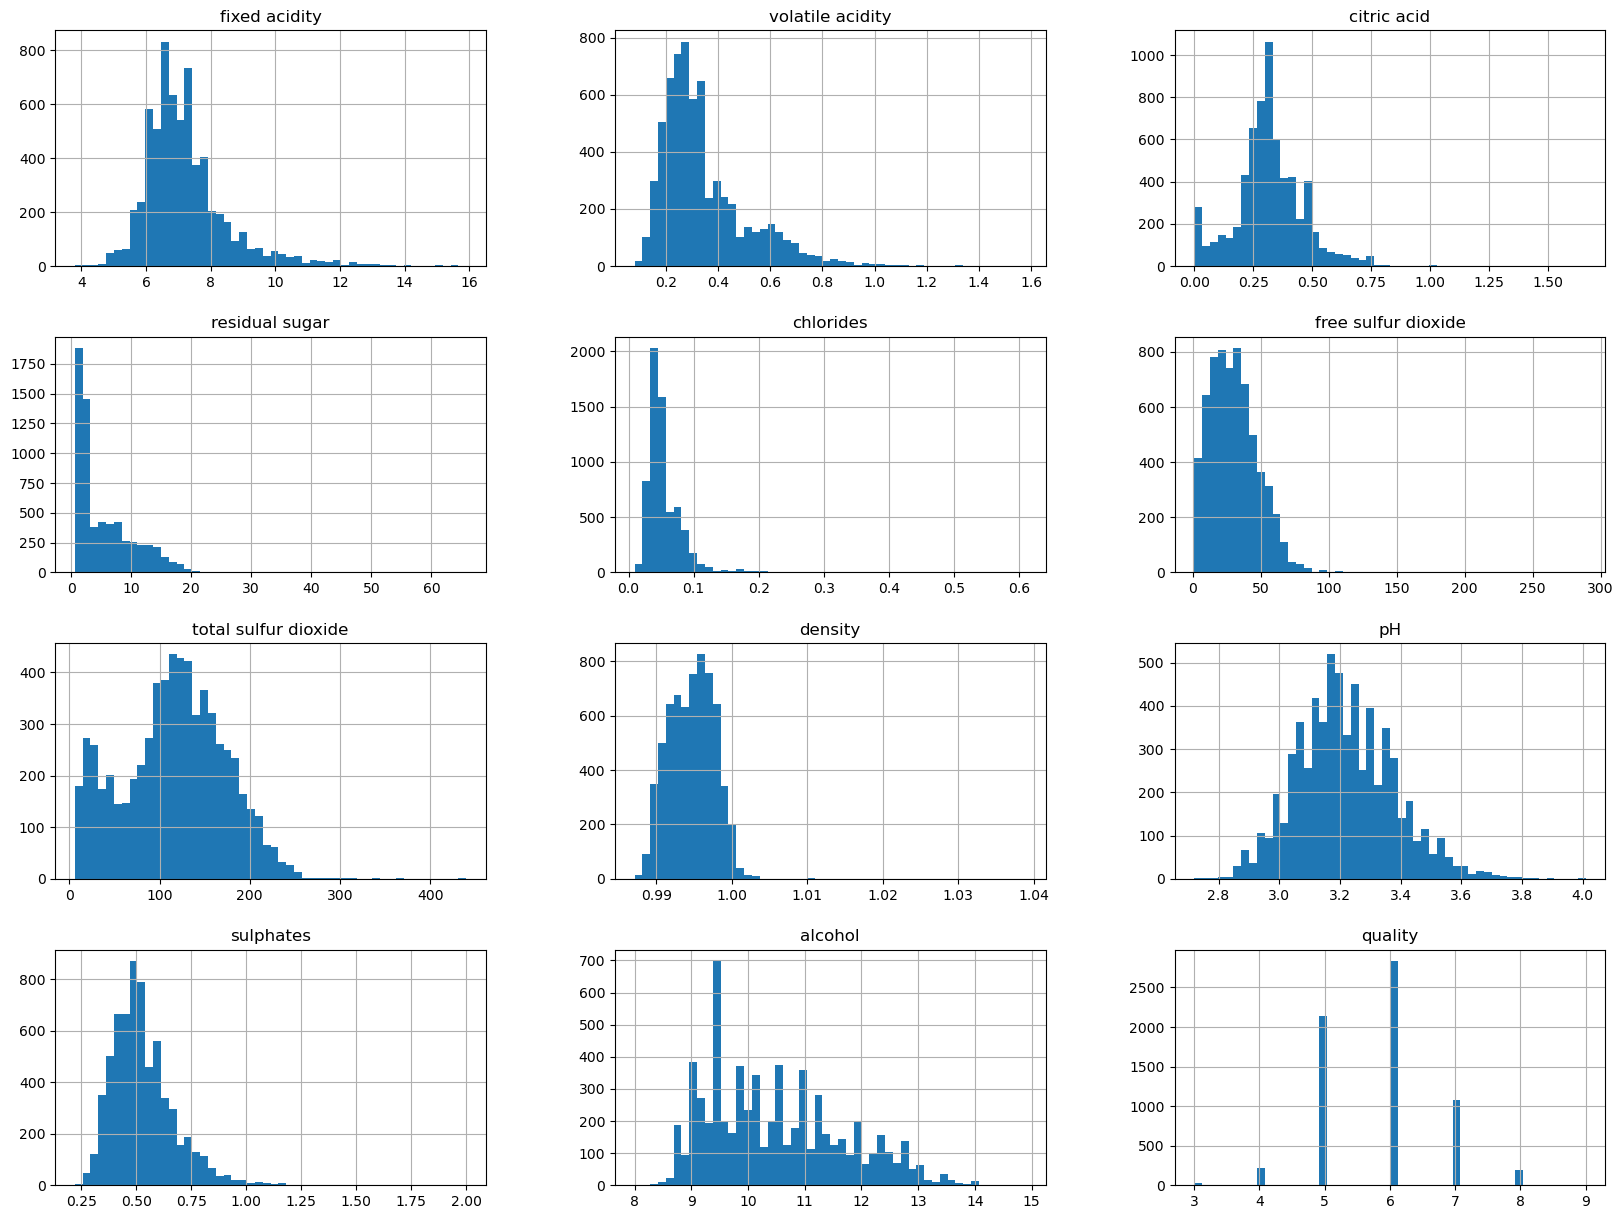

In [14]:
wines.hist(bins=50, figsize=(20,15))
plt.show()

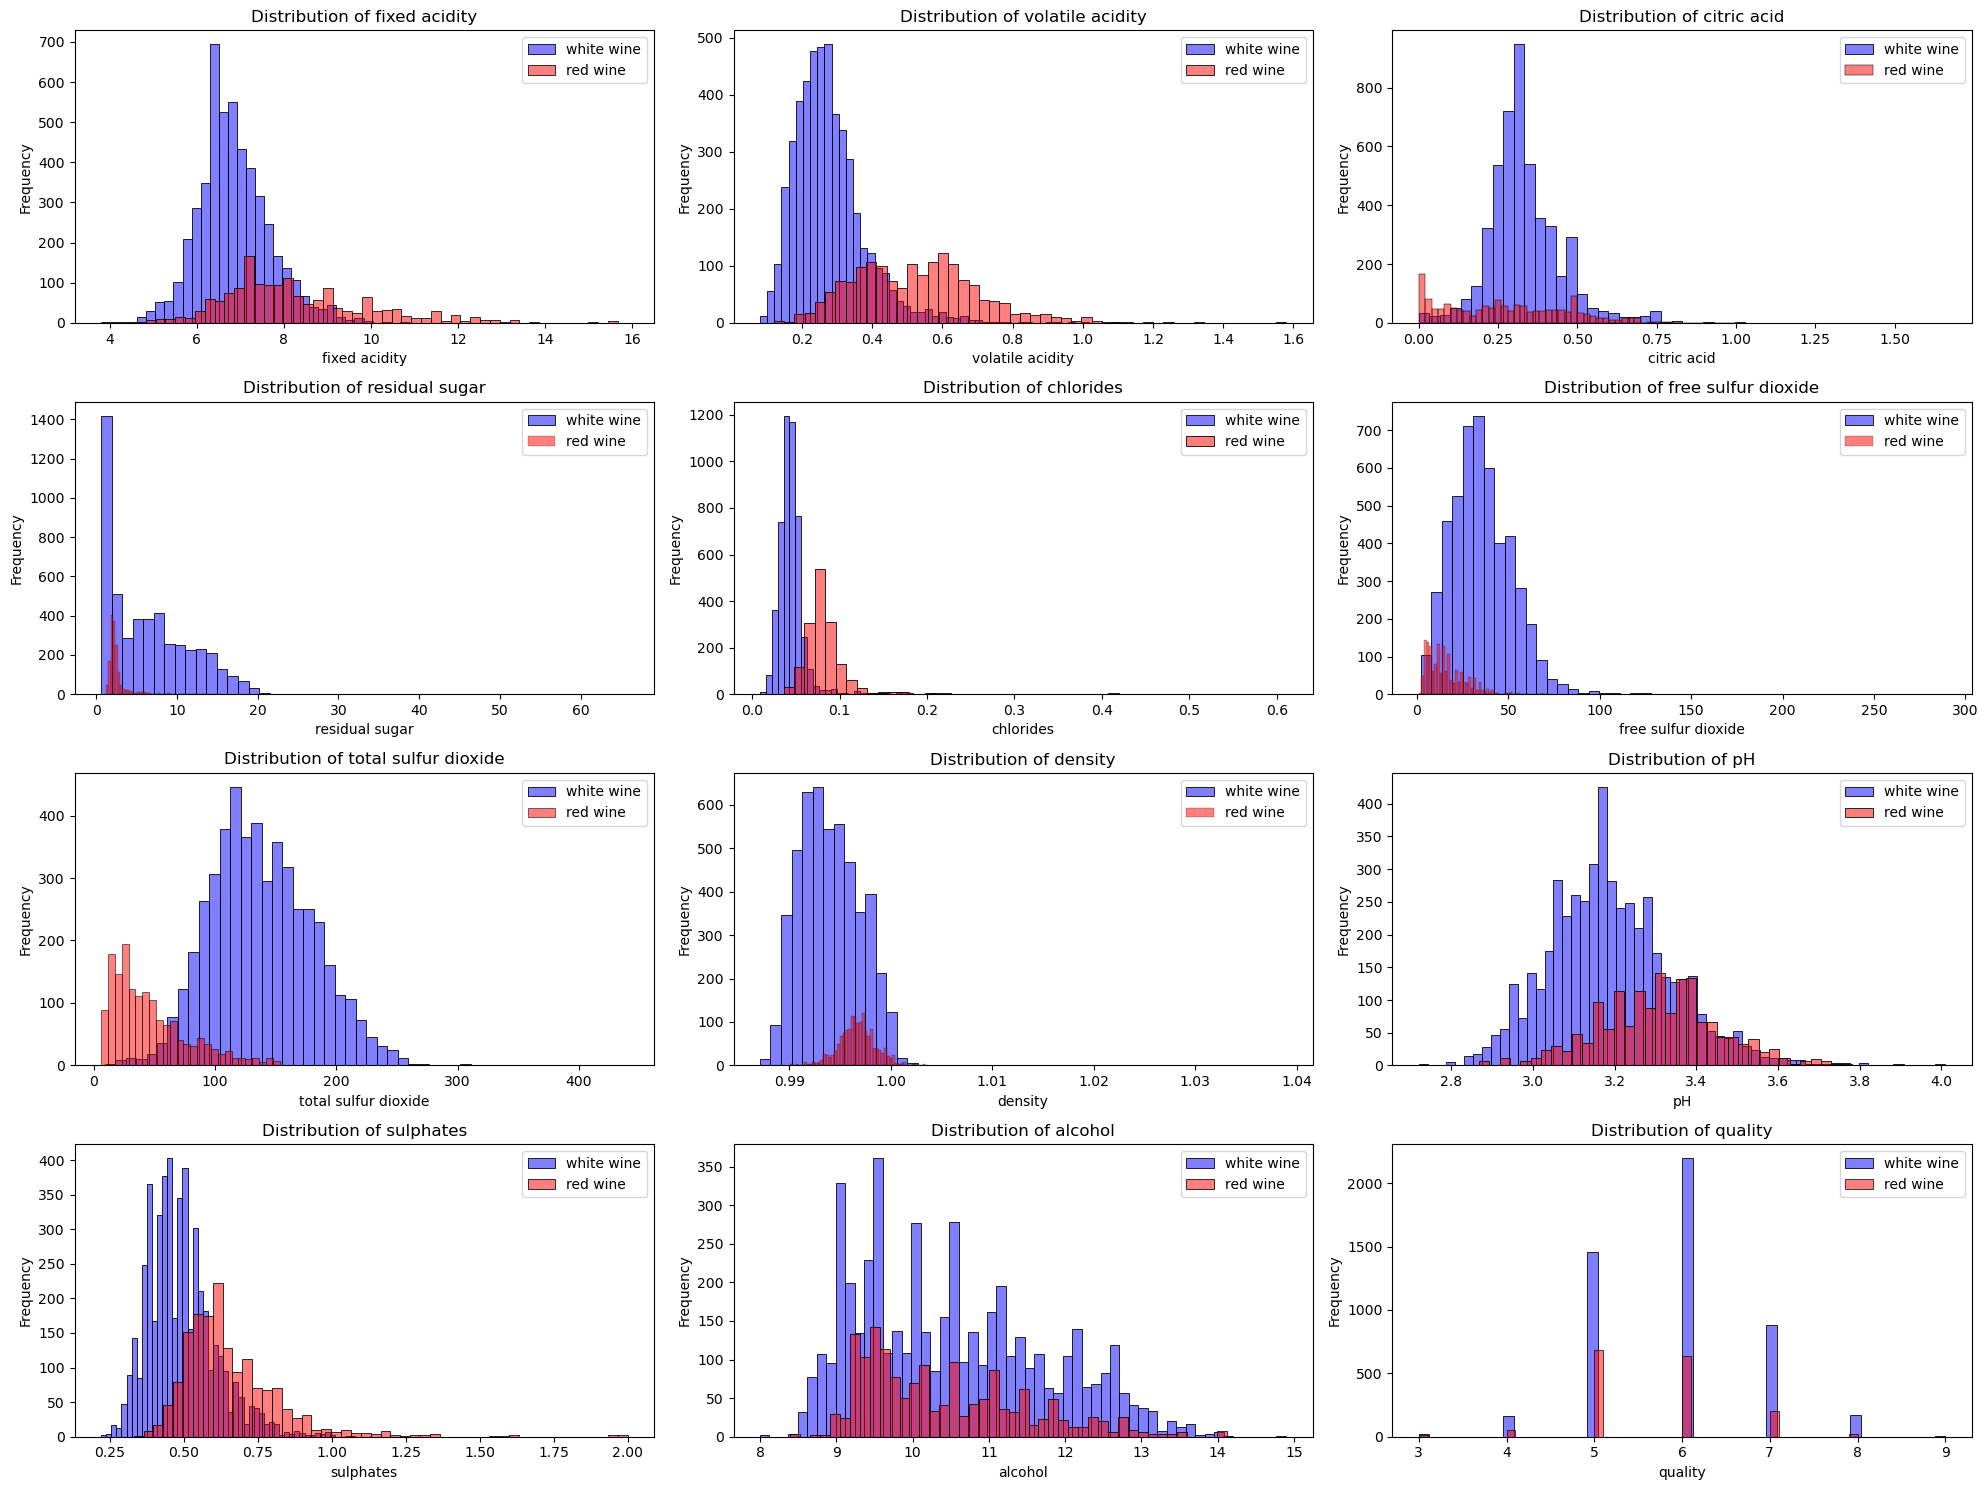

In [18]:

numerical_cols = wines.select_dtypes(include=['float64', 'int64']).columns
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(wines[wines["type"] == "white"][col], color="blue", label="white wine", kde=False, bins=50, alpha=0.5, ax=axes[i] )
    sns.histplot(wines[wines["type"] == "red"][col], color="red", label="red wine", kde=False, bins=50, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()
    
plt.tight_layout()
plt.show()

In [20]:
wines["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [30]:
bins = [2,5,6,11]
labels = ["low", "medium", "high"]
wines["quality_label"] = pd.cut(wines["quality"], bins=bins, labels=labels, include_lowest=True)

In [31]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium


In [33]:
wines["quality_label"].value_counts()

quality_label
medium    2836
low       2384
high      1277
Name: count, dtype: int64

In [34]:
X = wines.drop(columns=["quality", "quality_label"])
y = wines["quality_label"]

In [38]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white


In [39]:
y.head()

0    medium
1    medium
2    medium
3    medium
4    medium
Name: quality_label, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ['type']

X_train_num = X_train[numerical_cols]
X_test_num = X_test[numerical_cols]

X_train_cat = X_train[categorical_cols]
X_test_cat = X_test[categorical_cols]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

encoder = OneHotEncoder(sparse=False)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=numerical_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=numerical_cols, index=X_test.index)

X_train_cat_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# 7. Concatenate the numerical and categorical DataFrames
X_train_final = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

rf_classifier = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_classifier.fit(X_train_final, y_train)

/Users/U756064/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomForestClassifier(class_weight='balanced', random_state=42)

In [57]:
y_pred = rf_classifier.predict(X_test_final)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[150  11  95]
 [  1 360 116]
 [ 40  87 440]]

Classification Report:
              precision    recall  f1-score   support

        high       0.79      0.59      0.67       256
         low       0.79      0.75      0.77       477
      medium       0.68      0.78      0.72       567

    accuracy                           0.73      1300
   macro avg       0.75      0.71      0.72      1300
weighted avg       0.74      0.73      0.73      1300

